In [92]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import numpy as np
import cv2
from glob import glob
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [94]:
color_imgs_path = '/content/drive/My Drive/Colab Notebooks/skin_detector/zdjecia_kolorowe'
blackwhite_imgs_path = '/content/drive/My Drive/Colab Notebooks/skin_detector/zdjecia_czarnobiale' 

In [95]:
# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")
# lower = np.array([0, 20, 60], dtype = "uint8")
# upper = np.array([20, 150, 255], dtype = "uint8")


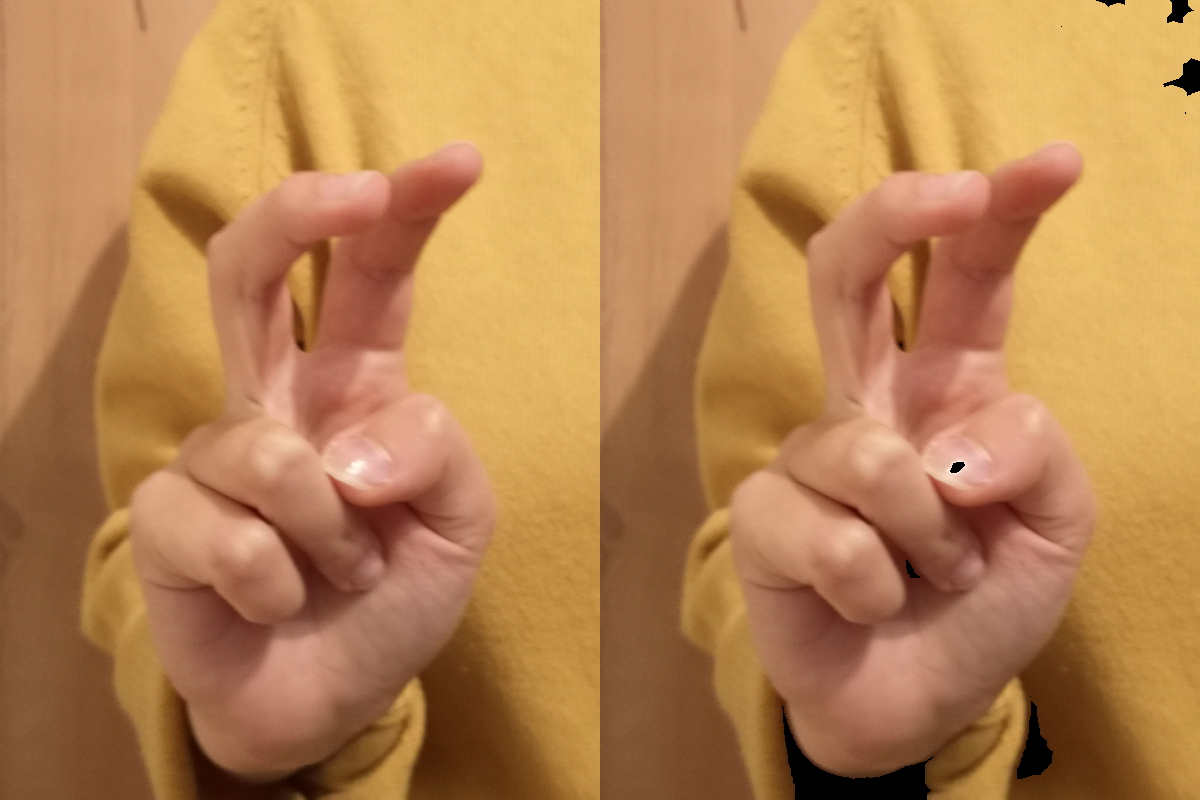

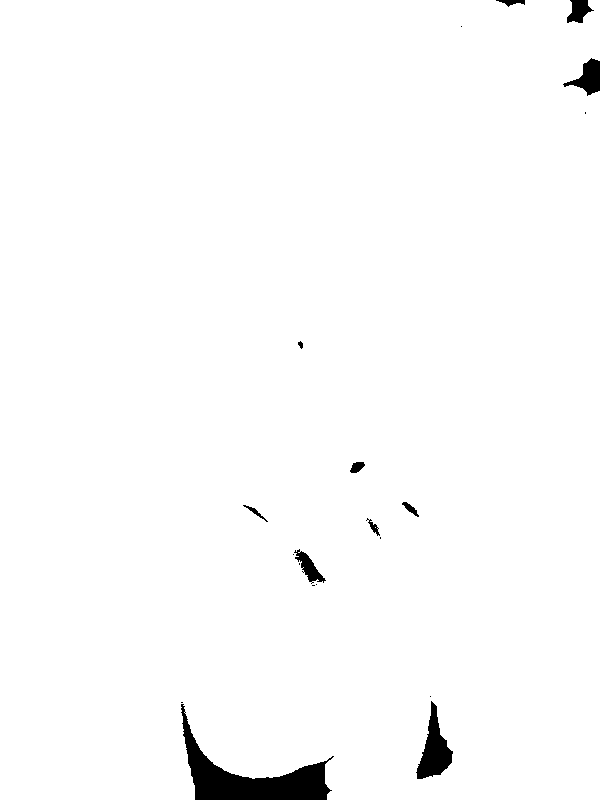

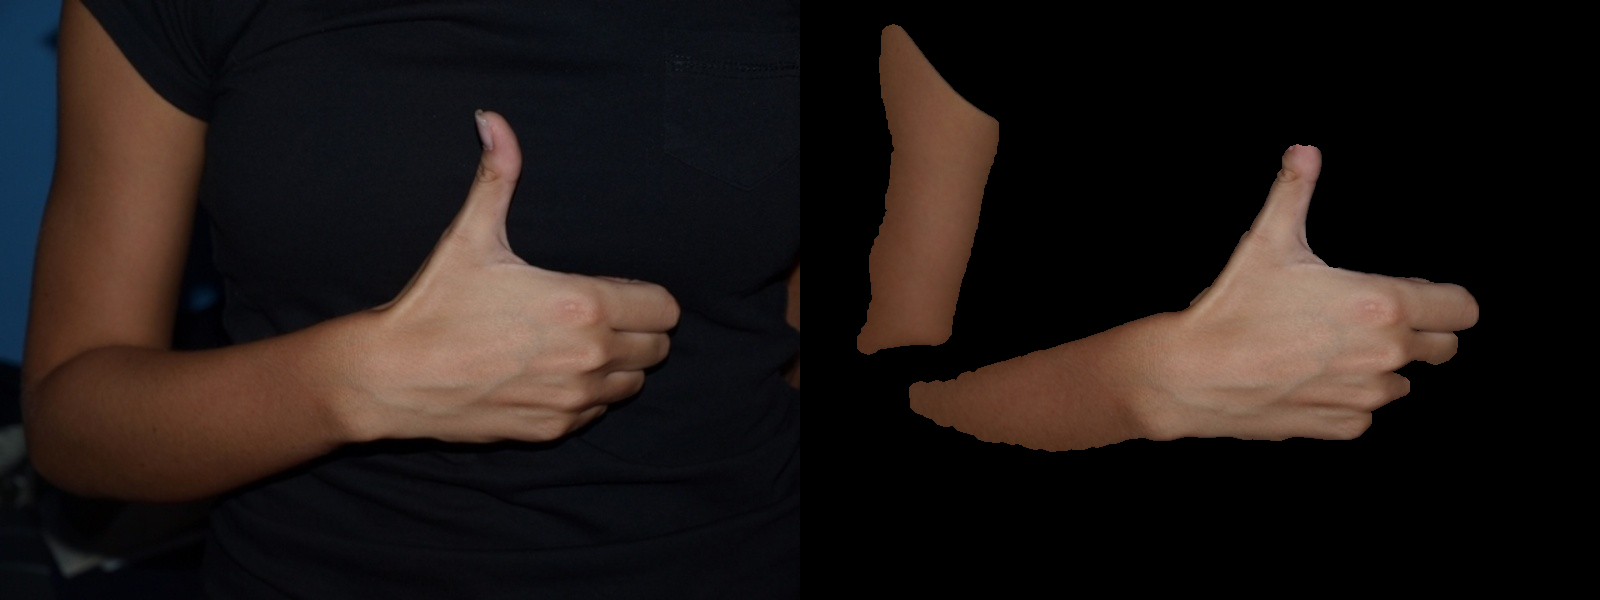

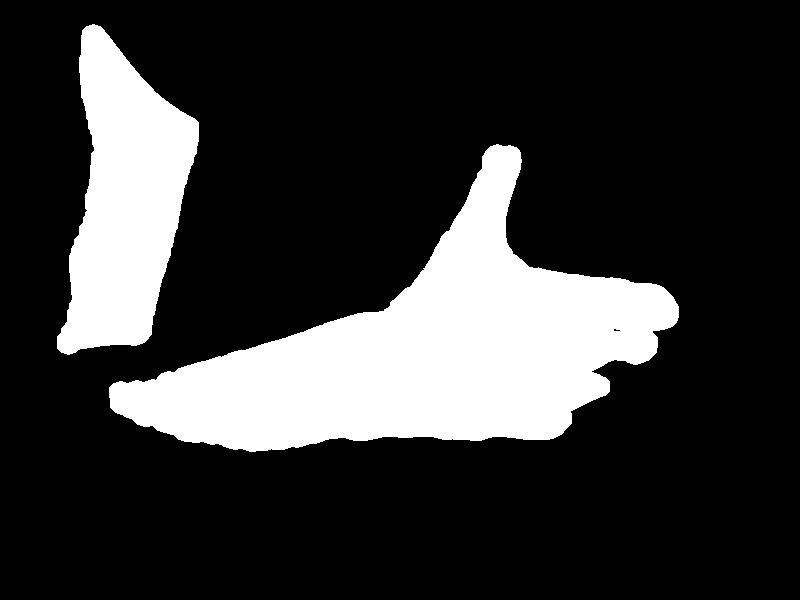

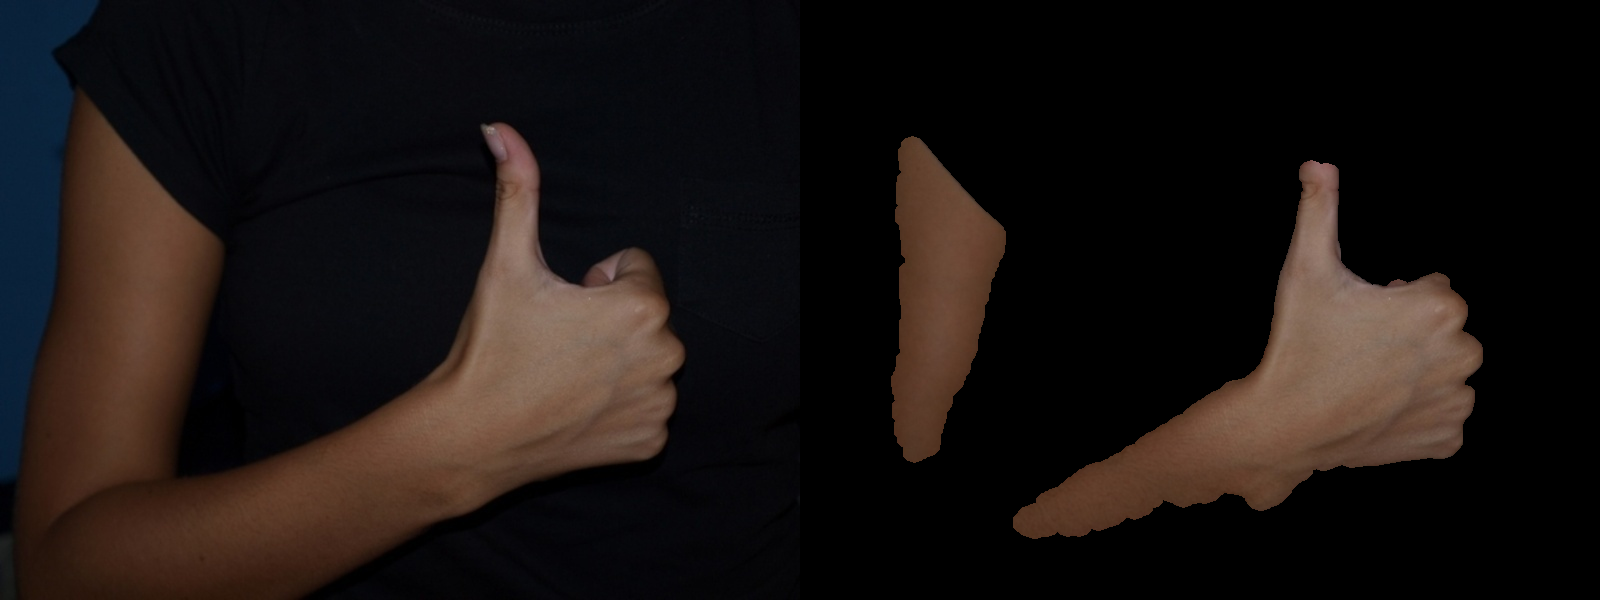

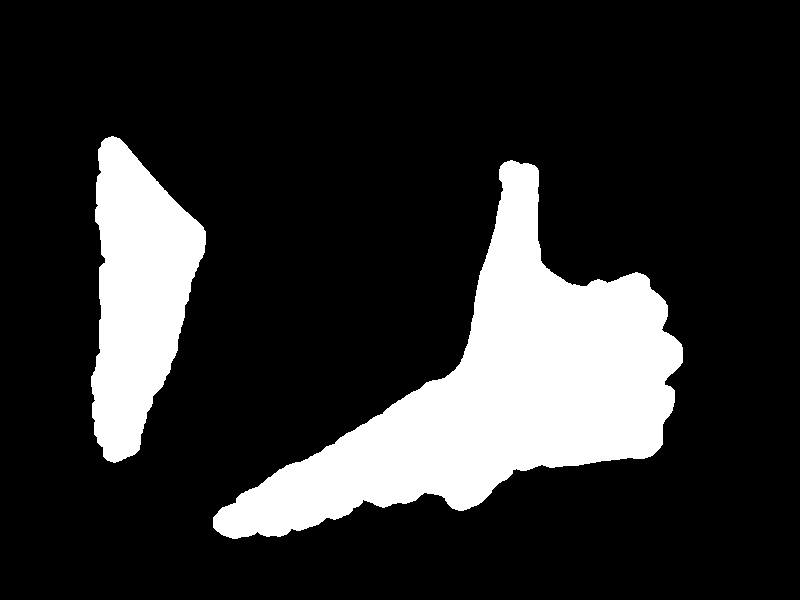

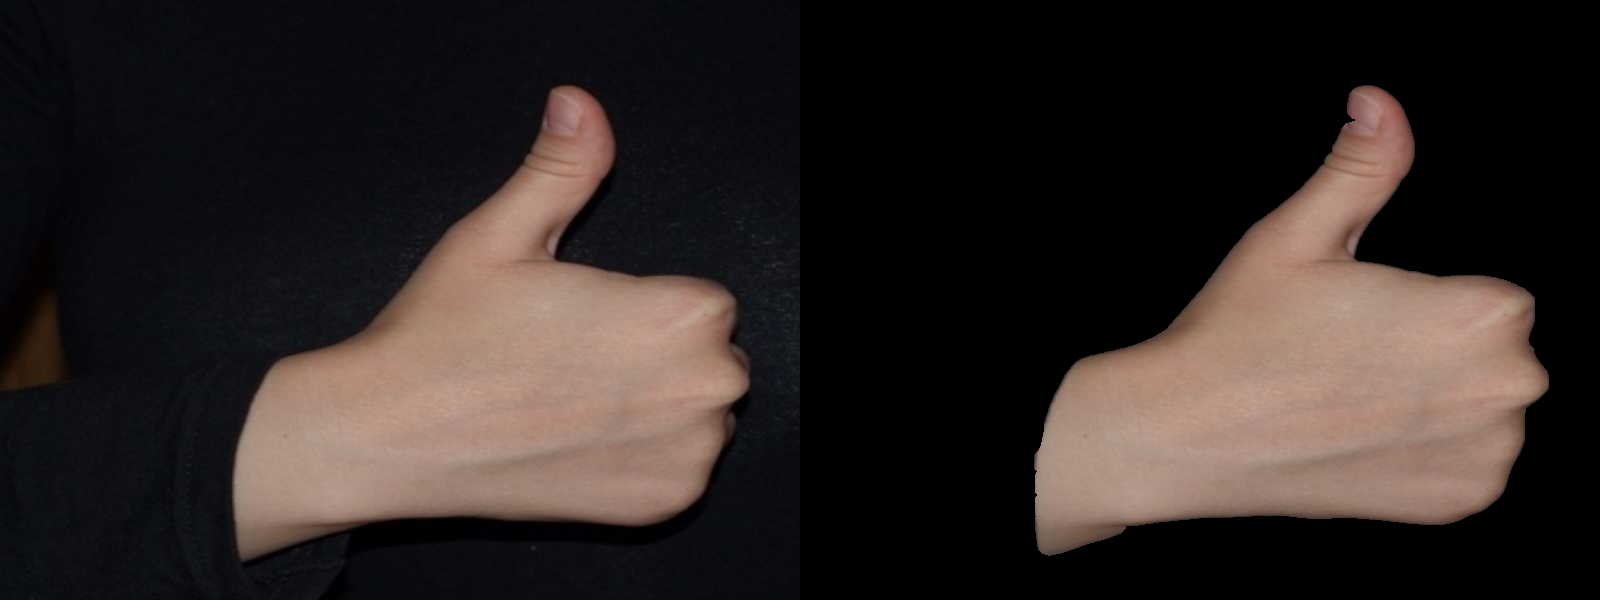

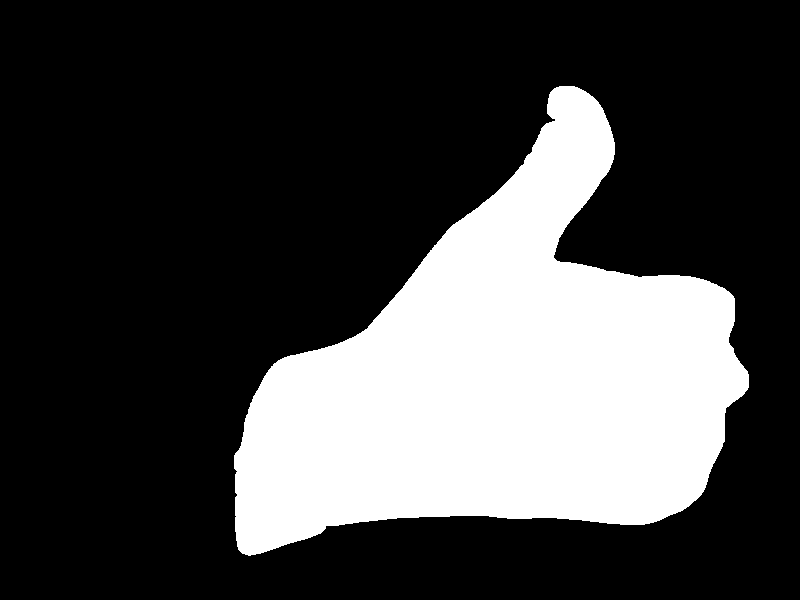

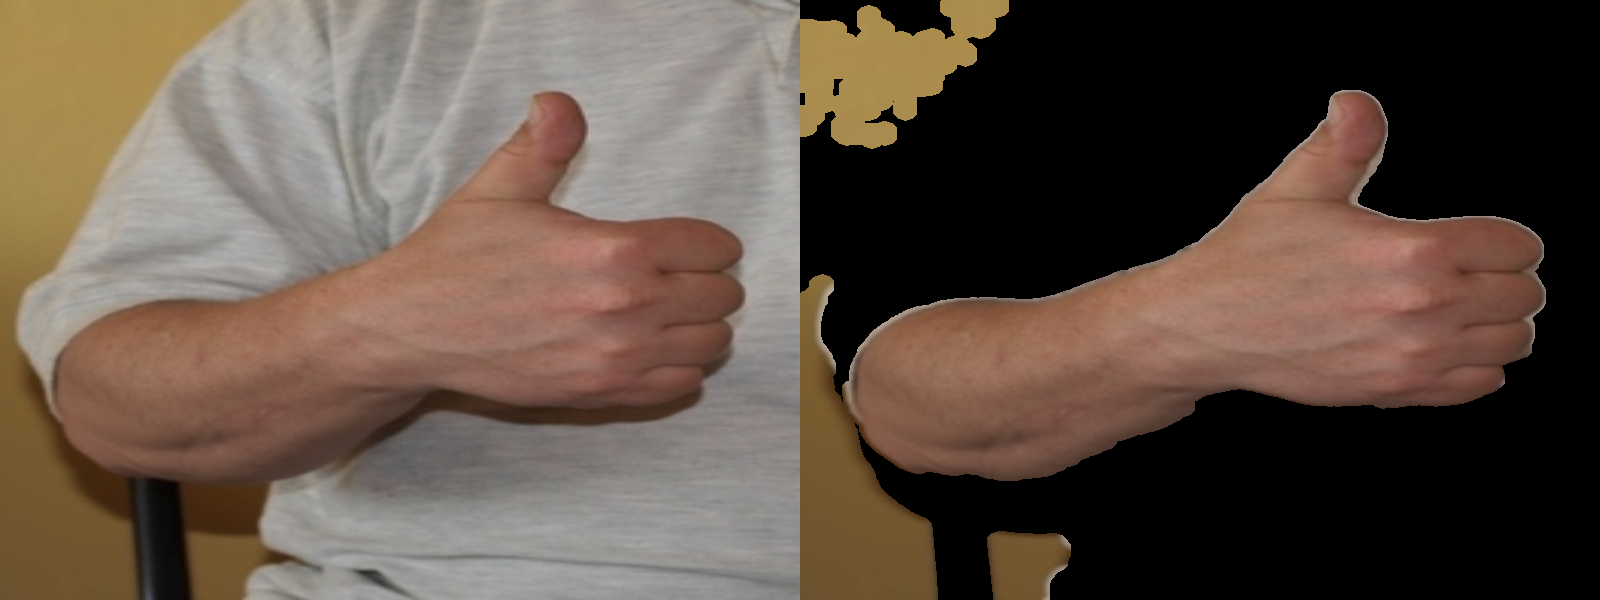

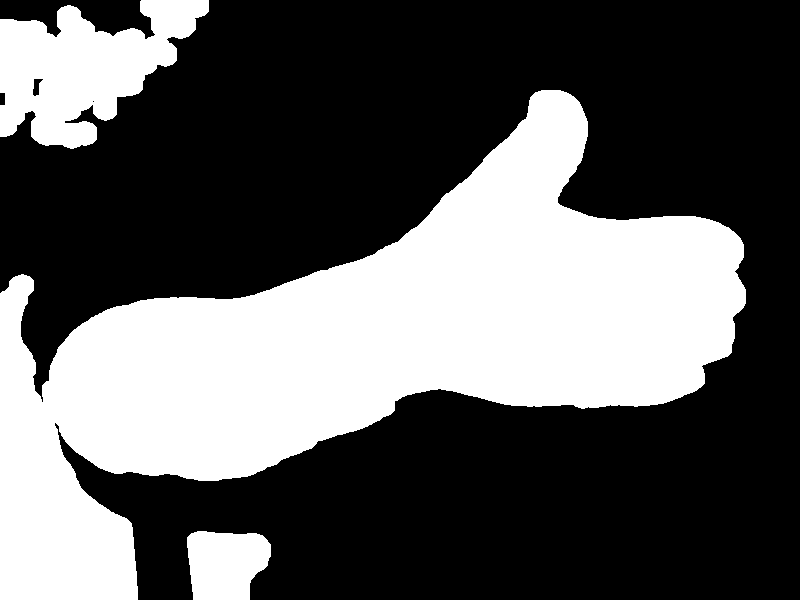

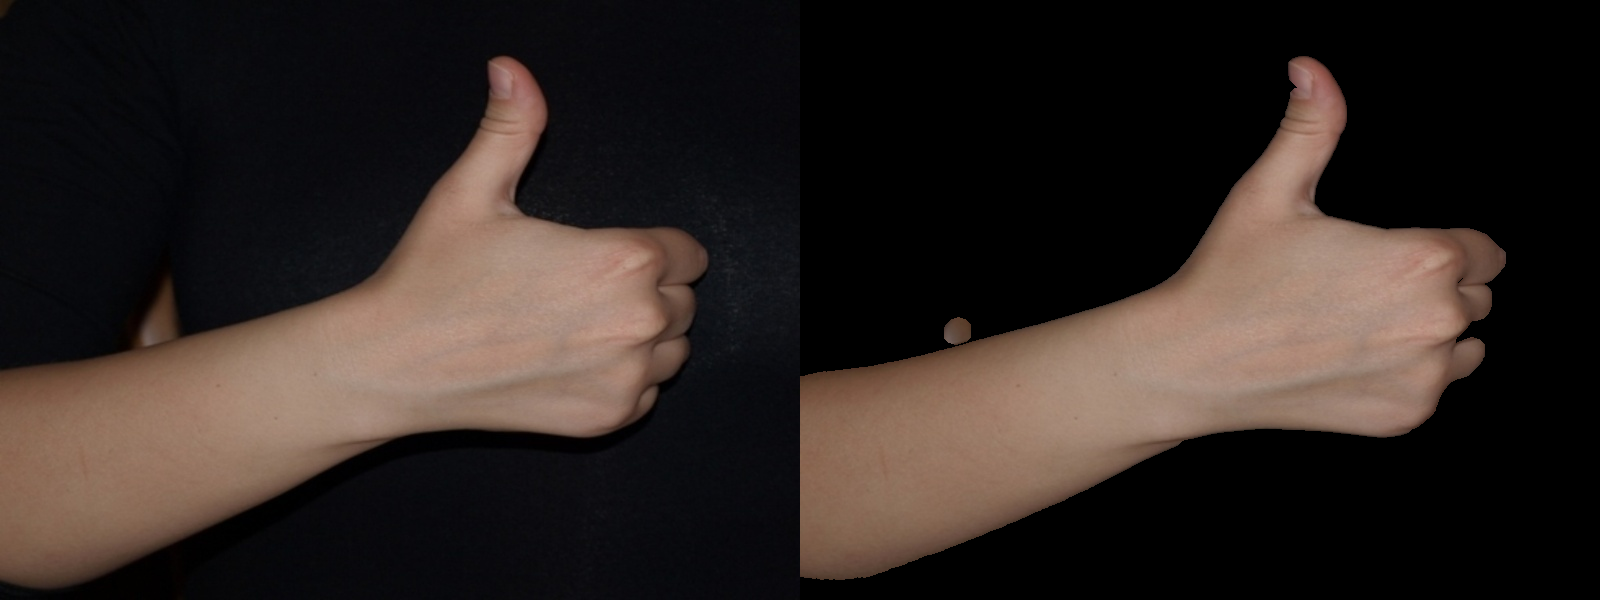

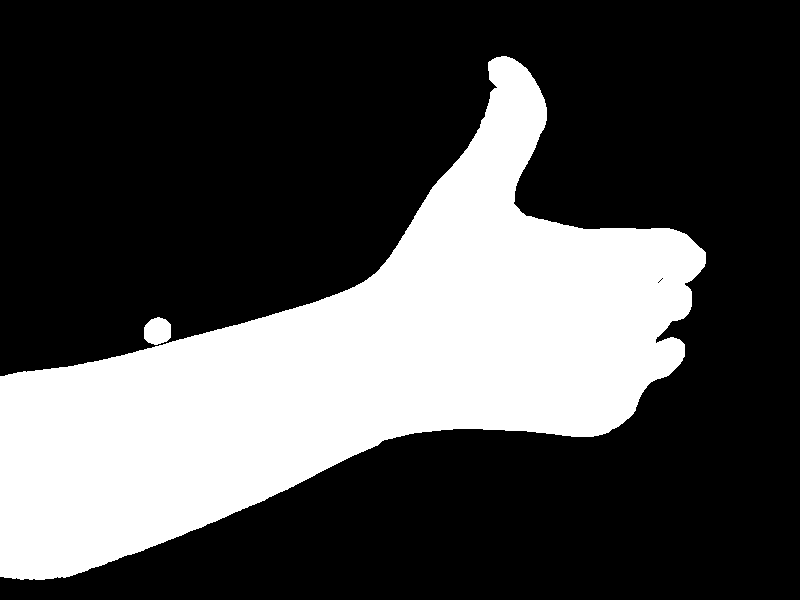

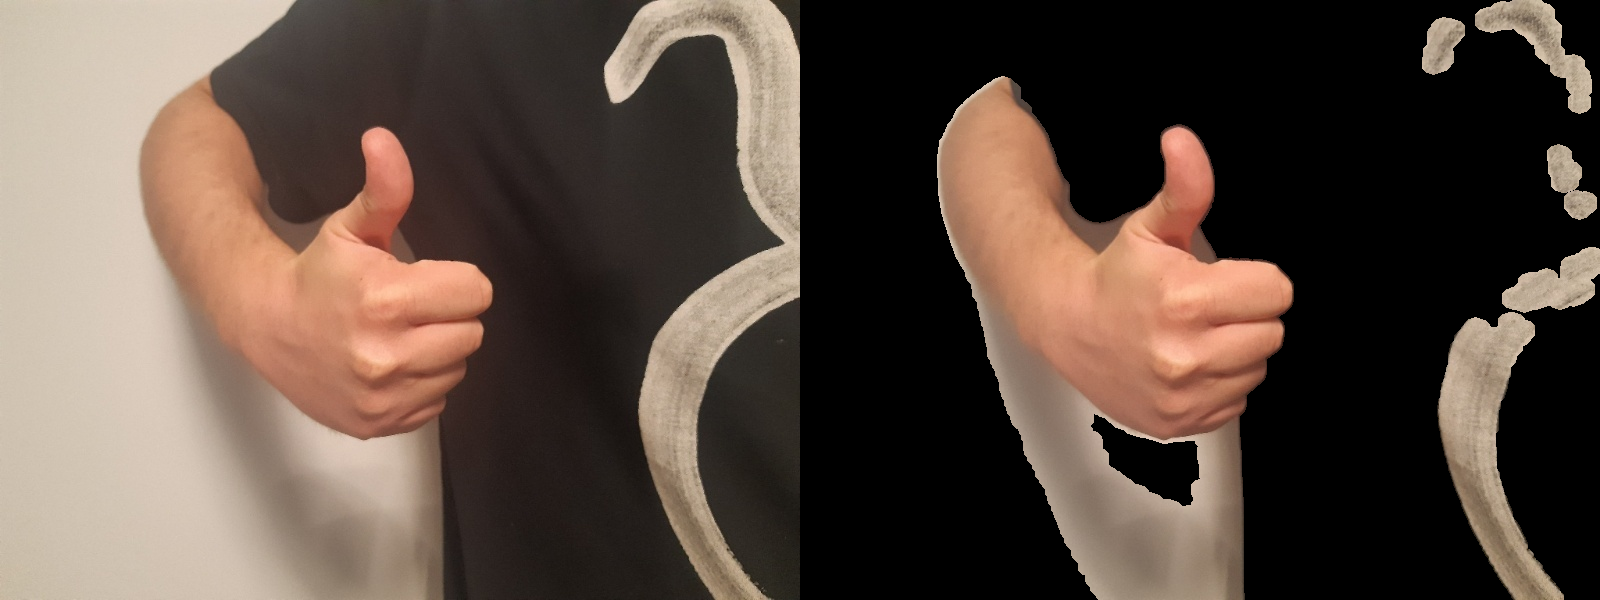

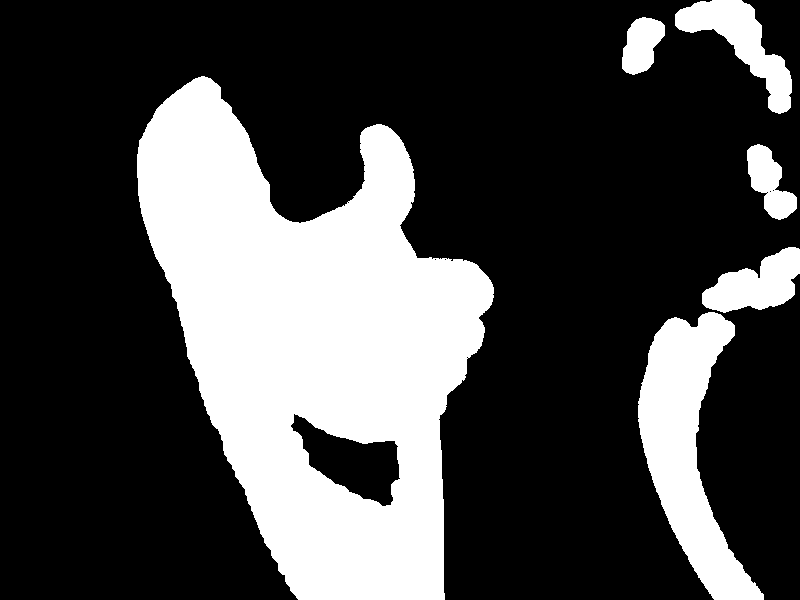

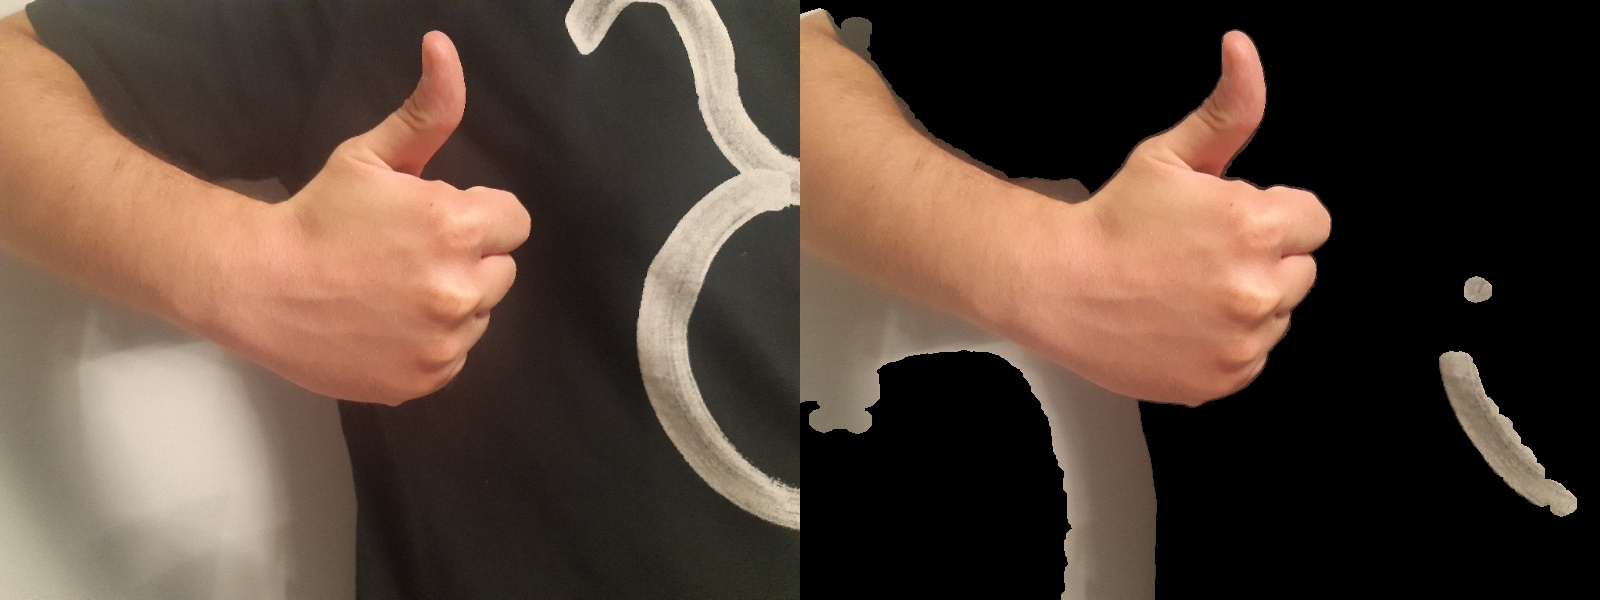

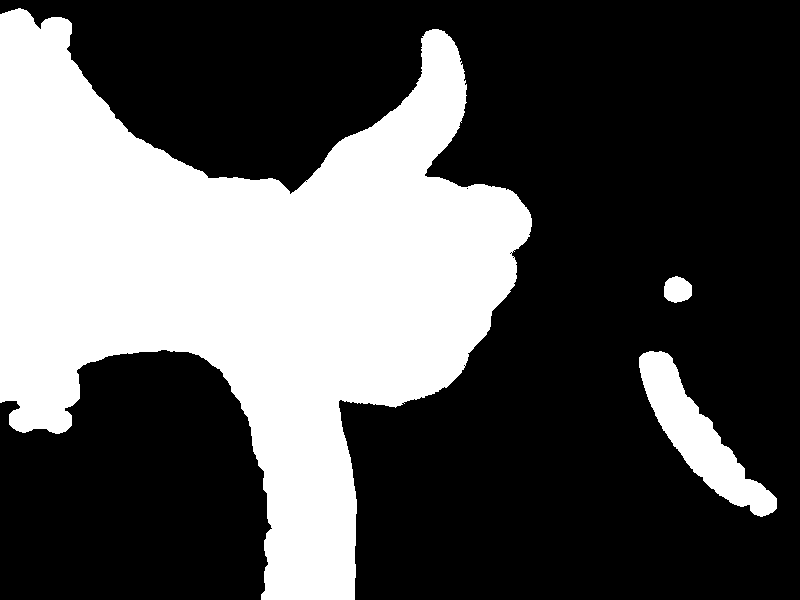

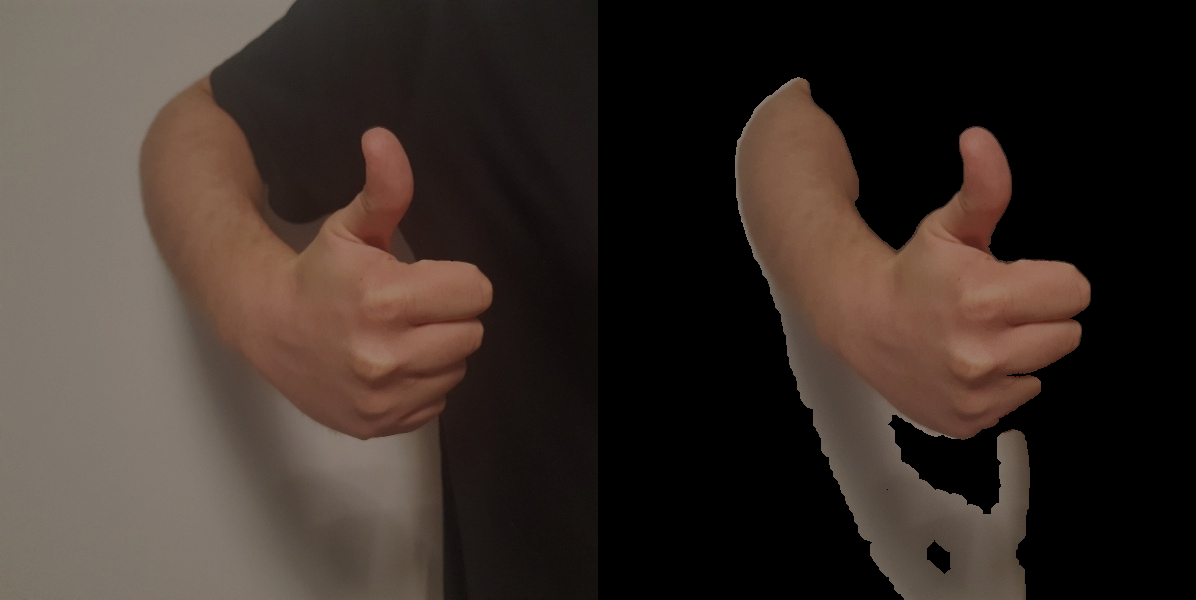

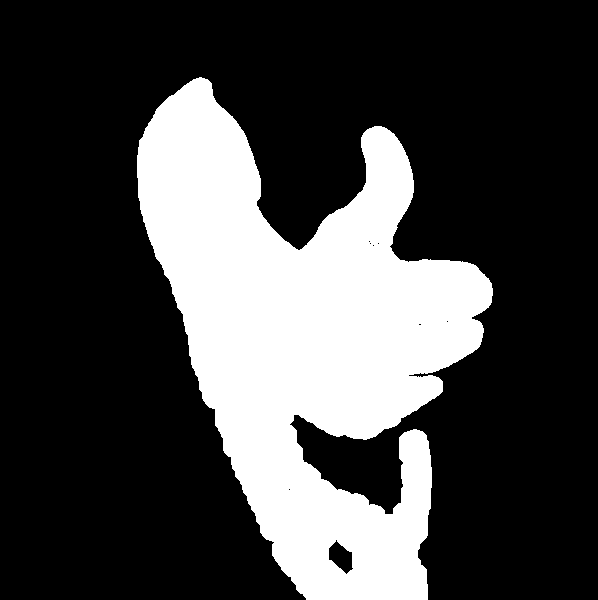

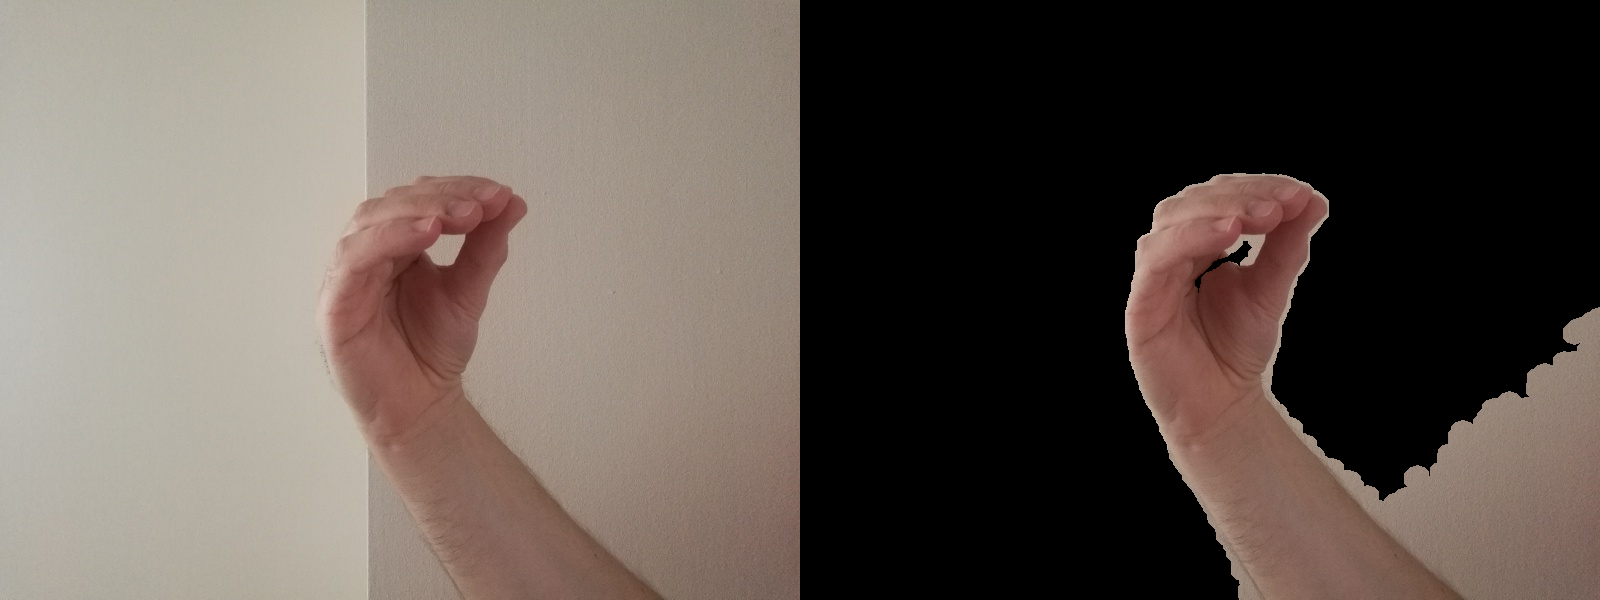

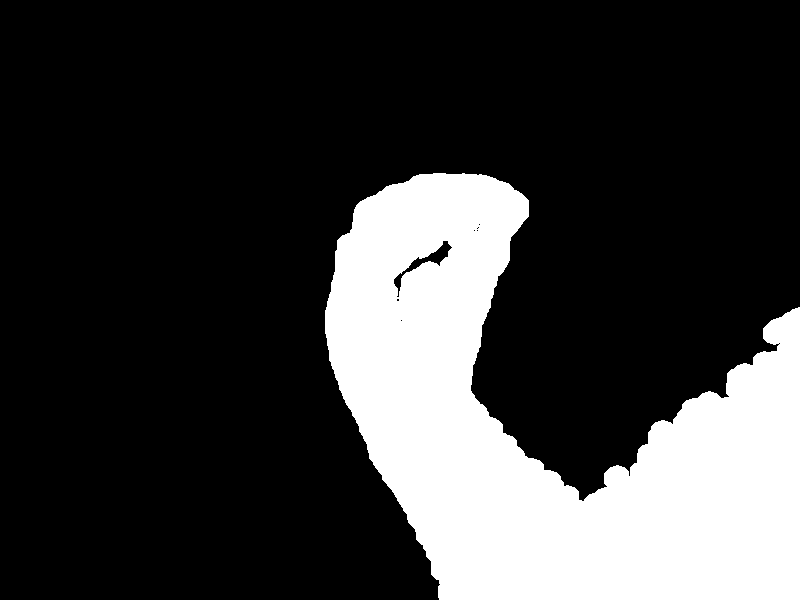

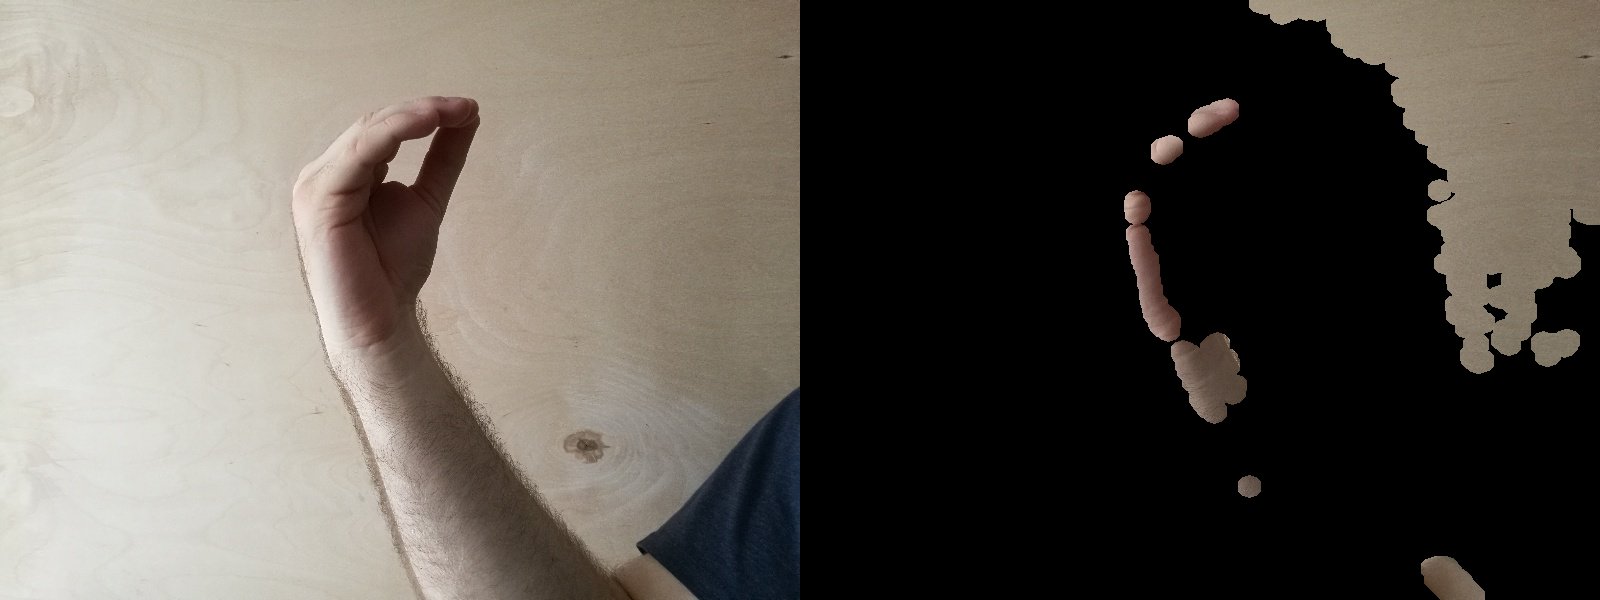

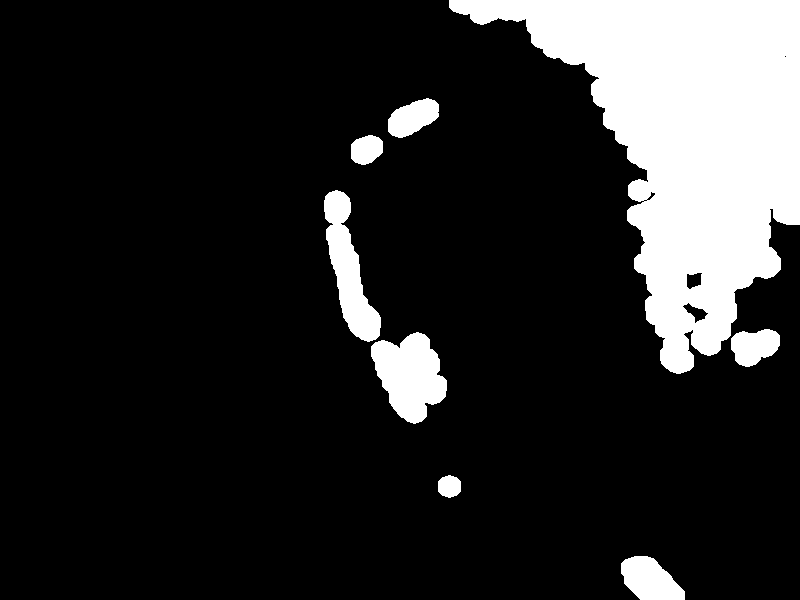

In [96]:

color_images = glob((f'{color_imgs_path}/*'))
for path in color_images:
    image = cv2.imread(path)
    converted = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    skinMask = cv2.inRange(converted, lower, upper)

    # plt.imshow(image)
    # plt.show()

    # apply a series of erosions and dilations to the mask
    # using an elliptical kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    skinMask = cv2.erode(skinMask, kernel, iterations = 2)
    skinMask = cv2.dilate(skinMask, kernel, iterations = 2)

    # blur the mask to help remove noise, then apply the
    # mask to the frame
    skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
    skin = cv2.bitwise_and(image, image, mask = skinMask)

    #binary image
    gray = cv2.cvtColor(skin, cv2.COLOR_BGR2GRAY)
    binary = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]


    cv2_imshow(np.hstack([image, skin]))
    cv2_imshow(binary)
    
    #save binary image
    # print(blackwhite_imgs_path + '/' + path.split('/')[7])
    cv2.imwrite(blackwhite_imgs_path + '/' + path.split('/')[7], binary)